# How to use CaSh to analyse disc and cavity shape

## Compute disc orbital parameters profiles

In [1]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import CaSh
import CaSh

In [3]:
# load an hdf5 snapshot
dump = CaSh.h5_Dump("/home/simone/CaSh/triple80_01000.h5")

In [4]:
# compute disc orbital parameters

r_in = 10 # smaller radius of inner bin in au
r_out = 100 # larger radius of outer bin in au
n_bins = 10 # number of bins

dump.compute_disc_orbital_parameters(r_in,r_out,n_bins)


Loading sinks properties (sinks):
    position (xyz)
    mass (m)
    velocity (vxyz)
Loading particles properties (particles):
    position (xyz)
    mass (massoftype)
    velocity (vxyz)
Arrays loaded correctly.


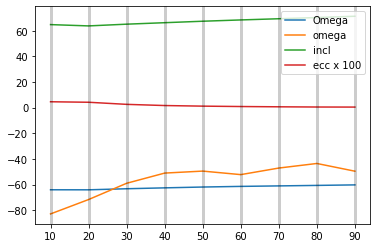

In [5]:
# plot disc orbital parameters profiles

plt.plot(dump.anu_sma[:-1],np.degrees(dump.anu_Omega) ,label='Omega')
plt.plot(dump.anu_sma[:-1],np.degrees(dump.anu_omega) ,label='omega')
plt.plot(dump.anu_sma[:-1],np.degrees(dump.anu_incl) ,label='incl')
plt.plot(dump.anu_sma[:-1],dump.anu_ecc*100 ,label='ecc x 100')

[plt.axvline(x=asd, alpha=0.2, c='k', lw=3.) for asd in dump.anu_sma[:-1]]

plt.legend()
plt.show()

## Compute cavity orbital parameters

In [6]:
# compute cavity orbital parameters
n_min = 1
n_max = 100
n_bins = 1000

# queste vanno messe insieme nella classe
dump.compute_cavity_sma(n_bins, n_min, n_max)
dump.compute_cavity_orbital_parameters()

print("Cavity semi-major axis:", dump.cav_a, dump.cavity_sma)
print("Cavity eccentricity:", dump.cav_e)
print("Cavity inclination:", dump.cav_i)
print("Cavity Omega:", dump.cav_Omega)
print("Cavity omega:", dump.cav_omega)

Cavity semi-major axis: 20.0 19.135135135135137
Cavity eccentricity: 0.04191885329253566
Cavity inclination: 1.112837774066347
Cavity Omega: -1.119169213291127
Cavity omega: -1.2515327412636537


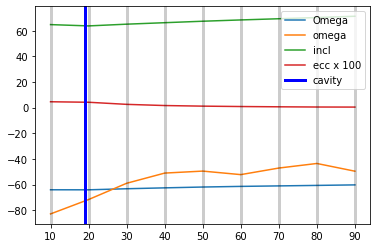

In [7]:
# same plot as before but with cavity semi-major axis
# plot disc orbital parameters profiles

plt.plot(dump.anu_sma[:-1],np.degrees(dump.anu_Omega) ,label='Omega')
plt.plot(dump.anu_sma[:-1],np.degrees(dump.anu_omega) ,label='omega')
plt.plot(dump.anu_sma[:-1],np.degrees(dump.anu_incl) ,label='incl')
plt.plot(dump.anu_sma[:-1],dump.anu_ecc*100 ,label='ecc x 100')

[plt.axvline(x=asd, alpha=0.2, c='k', lw=3.) for asd in dump.anu_sma[:-1]]
plt.axvline(x=dump.cavity_sma, c='b', lw=3., label='cavity')


plt.legend()
plt.show()

### Overplot disc and cavity shape on density snapshot with Plonk

In [8]:
import plonk

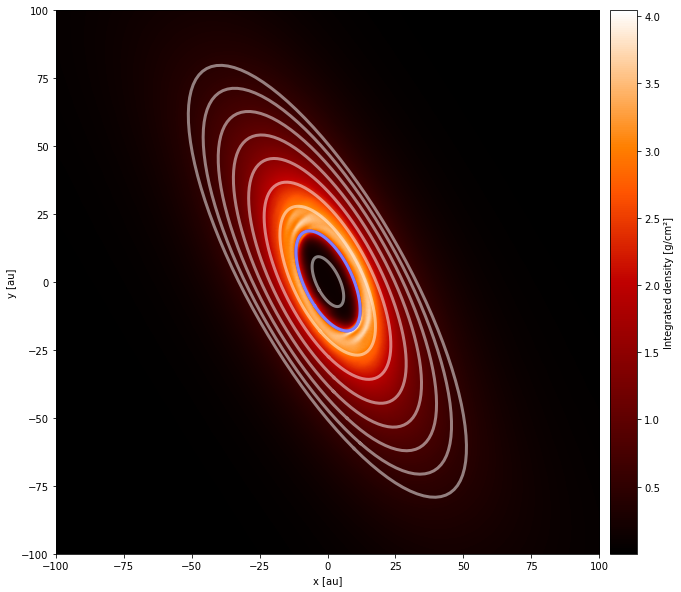

In [9]:
# plot snapshot density

units = {'position': 'au', 'density': 'g/cm^3', 'projection': 'cm'}
snap=plonk.load_snap(dump.dump_filename.split('.')[0]+".h5")
ax=snap.image(quantity='density',
                   extent=(-100, 100, -100, 100),
              units=units,
              cmap='gist_heat',
                    )

ax.figure.set_size_inches(12, 10)

# compute cavity orbit
cavity_xyz = dump.compute_cavity_shape()
orbit_xyz = dump.compute_disc_shape()

# plot cavity orbit over snapshot
ax.plot(cavity_xyz[:,0], cavity_xyz[:,1], 'b', lw=3.)

# plot disc shape over snapshot
[ax.plot(orbit[:,0], orbit[:,1], 'w',  alpha=0.5, lw=3.) for orbit in orbit_xyz]

plt.show()